# Курсовая работа. Блок 1
*Pandas и Matplotlib*

**NB!** Код должен быть с комментариями к каждому логическому блоку кода. В противном случае работа **не** будет принята. <br><br>
Выполнение курсовой работы может потребовать использование дополнительных библиотек. 

<br><br>
**Описание работы:**

Перед вами стоит бизнес-задача – на основании имеющихся данных подготовить аналитический отчет, который в дальнейшем поможет продюсерам образовательных программ эффективно выстраивать стратегию по модернизированию и улучшению курсов. В начале отчета предлагается оформить емкий описательный блок по каждому курсу на основании рассчитанных показателей. Далее предлагается посчитать потенциальную нагрузку на преподавателей, чтобы оценить необходимость расширения штата сотрудников. Затем идет блок из двух пунктов по анализу качества контента курсов, где необходимо выявить проблемные модули, которые, возможно, требуют доработки. Также стоит задача выявить потенциальную сезонность. Наконец, предложено задание для самостоятельной разработки метрики успеваемости студентов для нахождения тех, кто значительно хуже справляются с прохождением курса. Каждый из пунктов анализа предполагается сопроводить аналитическим выводом на основании рассчитанных метрик.

<br><br>

_________
Обозначения:<br><br>
&nbsp;&nbsp;&nbsp;&nbsp;**(p)** – задание может быть выполнено после прохождения модулей по Pandas <br>
&nbsp;&nbsp;&nbsp;&nbsp;**(m)** – задание может быть выполнено после прохождения модуля по Matplotlib <br>
&nbsp;&nbsp;&nbsp;&nbsp;⭐ – необязательное задание повышенной сложности
_________

[Codebook](#Codebook) <br>
[1. Описание и начальная работа с данными](#1.1-Описание-и-начальная-работа-с-данными)<br>
[2. Расчет потенциальной нагрузки на преподавателей](#2.-Расчет-потенциальной-нагрузки-на-преподавателей)<br>
[3. Выявление проблемных модулей](#3.-Выявление-проблемных-модулей)<br>
[4. Расчет конверсии](#4.-Расчет-конверсии) <br>
[5. Метрика успеваемости ](#5.-Метрика-успеваемости)

## Codebook

`courses.csv` содержит следующие значения: <br><br>
&nbsp;&nbsp;&nbsp;&nbsp; `id` – идентификатор курса <br>
&nbsp;&nbsp;&nbsp;&nbsp; `title` – название курса <br>
&nbsp;&nbsp;&nbsp;&nbsp;  `field` – сфера, к которой относится курс <br> <br><br>
`students.csv` содержит следующие значения: <br><br>
&nbsp;&nbsp;&nbsp;&nbsp; `id` – идентификатор студента <br>
&nbsp;&nbsp;&nbsp;&nbsp; `city` – город студента <br>
&nbsp;&nbsp;&nbsp;&nbsp;  `birthday` – день рождения студента <br> <br><br>
`course_contents.csv` содержит следующие значения: <br><br>
&nbsp;&nbsp;&nbsp;&nbsp; `course_id` – идентификатор курса <br>
&nbsp;&nbsp;&nbsp;&nbsp; `module_number` – номер модуля <br>
&nbsp;&nbsp;&nbsp;&nbsp;  `module_title` – название модуля <br> 
&nbsp;&nbsp;&nbsp;&nbsp; `lesson_number` – номер урока <br>
&nbsp;&nbsp;&nbsp;&nbsp;  `lesson_title` – название урока <br>
&nbsp;&nbsp;&nbsp;&nbsp;  `lesson_token` – токен урока <br> 
&nbsp;&nbsp;&nbsp;&nbsp; `is_video` – наличие видео *(true/false)* <br>
&nbsp;&nbsp;&nbsp;&nbsp;  `is_homework` – наличие домашней работы *(true/false)* <br>
<br><br>
`progresses.csv` содержит следующие значения: <br><br>
&nbsp;&nbsp;&nbsp;&nbsp; `id` – идентификатор прогресса <br>
&nbsp;&nbsp;&nbsp;&nbsp; `student_id` – идентификатор студента <br>
&nbsp;&nbsp;&nbsp;&nbsp;  `course_id` – идентификатор курса <br> <br><br>
`progress_phases.csv` содержит следующие значения: <br><br>
&nbsp;&nbsp;&nbsp;&nbsp; `progress_id` – идентификатор прогресса <br>
&nbsp;&nbsp;&nbsp;&nbsp; `module_number` – номер модуля <br>
&nbsp;&nbsp;&nbsp;&nbsp; `lesson_number` – номер урока <br>
&nbsp;&nbsp;&nbsp;&nbsp;  `status` – статус прохождения урока <br>
&nbsp;&nbsp;&nbsp;&nbsp;  `start_date` – дата начала <br> 
&nbsp;&nbsp;&nbsp;&nbsp; `finish_date` – дата окончания <br>
<br><br>

In [1]:
import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from pandas.tseries.offsets import Day, MonthEnd, MonthBegin
from matplotlib.patches import Patch
from math import ceil


today = pd.to_datetime('today')

In [2]:
df_courses = pd.read_csv('courses.csv')
df_courses_content = pd.read_csv('course_contents.csv')
df_progress_phases = pd.read_csv('progress_phases.csv', parse_dates= ['start_date', 'finish_date'])
df_progresses = pd.read_csv('progresses.csv')
df_students = pd.read_csv('students.csv', parse_dates= ['birthday'])

In [3]:
df_students.birthday = pd.to_datetime(df_students.birthday, errors= 'coerce', yearfirst= True)

In [4]:
df_students.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43830 entries, 0 to 43829
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   id_       43830 non-null  int64         
 1   id        43830 non-null  object        
 2   city      13162 non-null  object        
 3   birthday  25490 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 1.3+ MB


In [5]:
print(df_courses.shape)
print(df_courses_content.shape)
print(df_progress_phases.shape)
print(df_progresses.shape)

(15, 4)
(1201, 8)
(350677, 6)
(15934, 3)


In [6]:
df_1 = pd.merge(df_progresses, df_progress_phases, left_on= 'id', right_on = 'progress_id')

print(df_1.shape)
print(df_progress_phases.shape)

(350677, 9)
(350677, 6)


In [7]:
df_2 = pd.merge(df_courses_content, df_1)
df_2.shape

(350677, 14)

In [8]:
%%time
df_3 = pd.merge(df_courses, df_2, left_on = 'id', right_on= 'course_id')
df_3.shape

Wall time: 251 ms


(350677, 18)

In [9]:
%%time
df_main = df_3.copy(deep = True)
df_main = df_main.drop(['Unnamed: 0', 'id_x', 'id_y'], axis = 1)
df_main.shape

Wall time: 184 ms


(350677, 15)

## 1. Описание и начальная работа с данными

Вам необходимо подготовить данные и описать их. Данные реальные и содержат пропущенные значения, а также лишние относительно друг друга данные. <br>

Объедините датасеты (кроме `students.scv`) в один общий для дальнейшей работы. Отдельный датасет создайте для расчета среднего возраста студентов курсов (отдельный датасет со `students.scv` нужен, чтобы в основном не потерять значения в основном датасете из-за того, что не по всем студентам есть анкетные данные о дате рождения). <br> <br>
Опишите данные: <br>
1. **(p)** Посчитайте
      * общее количество курсов в датасете, 
      * количество модулей на каждом курсе, 
      * количество уроков в каждом модуле на каждом курсе, 
      * медианное количество уроков в модуле на каждом курсе, 
      * количество учеников на каждом курсе
      * минимальный, максимальный, средний, медианный возраст студентов
      * минимальный, максимальный, средний, медианный возраст студентов на каждом курсе
2. **(m)** Постройте bar-chart, отражающий количество студентов на каждом курсе. Ticks нужно развернуть так, чтобы они были читаемы
3. **(m)** Постройте горизонтальный (столбцы должны располагаться горизонтально) bar-chart, отражающий количество студентов на каждом курсе. График должен иметь заголовок. Значения должны быть отсортированы. Цвет столбцов должен содержать информацию о сфере, к которой относится курс (то есть нужна легенда). Прозрачность должна стоять на отметке 0.1. На график должна быть нанесена линия медианы. У медианы должен быть свой цвет. Рамки у графика быть не должно ⭐
4.     На основании рассчитанных значений опишите данные (описание должно быть полным и покрывать все полученные выше метрики)

_____________________________________________________________________


Для того, чтобы проверить, что вы правильно соединили все датасеты в основной (без `students.csv`), запустите аналогичный приведенному ниже запрос. Выдача должна совпадать. Имейте в виду, что названия некоторых столбцов были переименованы.

##### 1.1.1 Посчитайте общее количество курсов в датасете

In [10]:
courses_total = df_main['title'].unique()
print(courses_total)
print(courses_total.shape)

['Java-разработчик c нуля' 'Веб-дизайн Базовый' 'Excel Базовый'
 'Руководитель digital-проектов' 'Веб-вёрстка для начинающих 2.0'
 'JavaScript с нуля' 'Анимация интерфейсов' 'Веб-дизайн PRO 2.0'
 'UX-дизайн' 'Интернет-маркетолог от Ingate' 'Веб-дизайн с нуля 2.0'
 'Веб-разработчик' 'SMM-маркетолог от А до Я'
 'PHP-разработчик с 0 до PRO. Часть 1' 'Java-разработчик']
(15,)


Для подготовки аналитического отчета взяты данные из 15 курсов.

##### 1.1.2 Посчитайте количество модулей на каждом курсе

In [11]:
df_main[['title', 'module_title']].groupby('title').nunique().sort_values('module_title', ascending= False)

,module_title
title,
Анимация интерфейсов,21
UX-дизайн,20
Веб-разработчик,20
Веб-дизайн с нуля 2.0,19
JavaScript с нуля,18
Интернет-маркетолог от Ingate,18
Java-разработчик,17
Веб-дизайн PRO 2.0,17
Веб-дизайн Базовый,17


Лидером по количеству модулей в курсе является курс "Анимация интерфейсов", наименьшее же количество модулей - в курсе "Веб-вёрстка для начинающих 2.0".

##### 1.1.3 Посчитайте количество уроков в каждом модуле на каждом курсе

In [12]:
count_lessons = df_main[['title', 'module_title', 'lesson_title']].groupby(['title', 'module_title']).nunique()


In [13]:
for i in courses_total:
    print('Название курса -', i)
    print(count_lessons.loc[i], end = '\n\n\n')

Название курса - Java-разработчик c нуля
                                                  lesson_title
module_title                                                  
Вводный модуль                                               7
Исключения, отладка, тестирование и логгирование             9
Массивы и коллекции                                         13
Наследование и полиморфизм                                  10
Объекты и классы                                            10
Особенности ООП в Java                                      12
Работа с файлами и сетью                                    11
Синтаксис языка                                              6
Числа, строки и даты                                        27


Название курса - Веб-дизайн Базовый
                                                   lesson_title
module_title                                                   
Базовые знания о типографике. Практика Photoshop              2
Веб-типографика                     

Лидером по количеству уроков в модуле является курс "Интернет-маркетолог от Ingate". На курсе "Веб-разработчик" модулей и курсов одинаковое количество.

##### 1.1.4 Посчитайте медианное количество уроков в модуле на каждом курсе

In [14]:
count_lessons.groupby('title').median()

,lesson_title
title,
Excel Базовый,5.0
Java-разработчик,7.0
Java-разработчик c нуля,10.0
JavaScript с нуля,7.0
PHP-разработчик с 0 до PRO. Часть 1,4.0
SMM-маркетолог от А до Я,6.0
UX-дизайн,3.5
Анимация интерфейсов,3.0
Веб-вёрстка для начинающих 2.0,7.0


##### 1.1.5 Посчитайте количество учеников на каждом курсе

In [15]:
df_main[['title', 'student_id']].groupby('title').nunique().sort_values('student_id', ascending= False)

,student_id
title,
Интернет-маркетолог от Ingate,2168
Веб-дизайн с нуля 2.0,2014
Веб-вёрстка для начинающих 2.0,2004
Веб-дизайн PRO 2.0,1711
UX-дизайн,1151
JavaScript с нуля,966
PHP-разработчик с 0 до PRO. Часть 1,854
Excel Базовый,782
Java-разработчик,763


Наиболее популярным является курс "Интернет-маркетолог от Ingate", а наименее - "SMM-маркетолог от А до Я".

##### 1.1.6 Посчитайте минимальный, максимальный, средний, медианный возраст студентов

In [16]:
students_age = df_students.copy(deep= True)

In [17]:
students_age['age'] = (today - students_age.birthday)// pd.Timedelta(days = 365)

In [18]:
students_age.age.agg(['mean', 'median', 'max', 'min'])

mean       31.367007
median     31.000000
max       138.000000
min      -178.000000
Name: age, dtype: float64

Средний возраст студента на курсах - 31 год. Минимальный и максимальный возрасты расчитывались на текущий момент исхождя из представленных дат рождения студентов. На данном этапе выявлены выбросы, отфильтруем их.

In [19]:
students_age[(students_age.age <= 0) | (students_age.age > 70)].sort_values('age', ascending= False)

,id_,id,city,birthday,age
1907,40413,d821f069181176226afb1fa672a73384,Saint Petersburg,1884-09-23,138.0
1594,26896,7e209b94e5c8f3a62dcd929bbecadf12,NaN,1888-11-11,133.0
27809,35870,cd76b85d8b38f29b33e34fc93949b33a,NaN,1896-05-03,126.0
38932,43938,0f55b5ea5ed4bc392301359f9e55c046,санкт-петербург,1900-01-01,122.0
38695,33205,5ddf39cab79f9e813dd16475e1e5f1a9,V,1900-11-09,121.0
13328,107897,ca5cd9685076b8e2c68319abe19805b8,NaN,1919-01-01,103.0
39384,109767,ecd6129d3e35a17476f40102ecb1b1ed,NaN,1919-05-03,103.0
16809,32190,56d0c82314515dec14712be22baed4ed,Чита,1919-03-03,103.0
43662,117886,4bc5e1606b9596cdfe2831c2abf91153,Кошкарагай,1919-01-01,103.0
20577,123780,da448b9692d1178d82e6394bff69ad37,NaN,1920-01-01,102.0


In [20]:
students_age = students_age.drop(students_age[(students_age.age <= 0) | (students_age.age > 70)].index)

In [21]:
students_age.age.agg(['mean', 'median', 'max', 'min'])

mean      31.297795
median    31.000000
max       70.000000
min        2.000000
Name: age, dtype: float64

После фильтрации данных и выявления выбросов была установлена граница максимального возраста в 70 лет, так как способности к обучению людей выше 70 лет вызывают сомнения. Далее отфильтруем данные для определения минимального возраста.

In [22]:
students_age[(students_age.age > 0) & (students_age.age < 17)]

,id_,id,city,birthday,age
240,28217,92245e0126e5276b2143b8489091333d,Москва,2006-03-18,16.0
366,33405,8f76aa793fe74c12bd442b2e3580a355,Екатеринбург,2005-09-22,16.0
410,35372,f02100edd996d6dafdbfff887c996cc7,Станция Кашира,2006-08-17,16.0
477,38271,dc002c889a16ef974802fd6f342ee74d,Москва,2018-02-19,4.0
930,104324,9392d6aa78d8f178d4e4a21606ed52bc,NaN,2006-02-10,16.0
...,...,...,...,...,...
42462,124060,6924d15e04fcebb2ba941b7d76ec411a,NaN,2006-05-03,16.0
42759,32002,61d1b406e2dab15a5bbfb65611f3f7d1,Краснотурьинск,2005-09-18,16.0
43028,44121,e1c14599afcb57f3a2b390719ff60b2f,Нижний Новгород,2006-06-12,16.0
43121,96238,27480e15de492a75c2c787d44e652e6b,Пенза,2018-08-06,4.0


In [23]:
students_age = students_age.drop(students_age[(students_age.age > 0) & (students_age.age < 17)].index)

In [24]:
students_age.age.agg(['mean', 'median', 'max', 'min'])

mean      31.432171
median    31.000000
max       70.000000
min       17.000000
Name: age, dtype: float64

В ходе исследования данных для выявления минимального возраста была выставлена граница в 17 лет, так как дальнейшее иследование данных показывает, что студенты младше на данных курсах не обучаются.

##### 1.1.7 Посчитайте минимальный, максимальный, средний, медианный возраст студентов на каждом курсе

In [25]:
df_main_students = df_main.copy(deep = True)
df_main_students.shape

(350677, 15)

In [26]:
df_main_students.head(1)

,title,field,course_id,module_number,module_title,lesson_number,lesson_title,lesson_token,is_video,is_homework,student_id,progress_id,status,start_date,finish_date
0,Java-разработчик c нуля,Development,943306102e5b067d08a29094f37b8193,1,Вводный модуль,1,Какие бывают программы,cf394764-8850-4a0a-8d02-03470fe5345c,True,False,0b4656b84ca60350583f8fbe236dda86,45cdf025b87db75e84f93c4ac3ccb5c7,done,2019-03-29 17:02:32.838469+00:00,2019-04-13 17:32:19.134874+00:00


In [27]:
students_age.head(1)

,id_,id,city,birthday,age
0,1325,35e8a1938b9a33d5e45c8f4451c4309a,NaN,NaT,NaN


In [28]:
df_main_students = df_main_students.merge(students_age, how = 'left', left_on = 'student_id', right_on = 'id', copy= False)
df_main_students.shape

(350677, 20)

In [29]:
df_main_students.head(1)
df_main_students = df_main_students.drop(['id_', 'id', 'city', 'birthday'], axis= 1)
df_main_students.shape

(350677, 16)

In [30]:
df_main_students.head()

,title,field,course_id,module_number,module_title,lesson_number,lesson_title,lesson_token,is_video,is_homework,student_id,progress_id,status,start_date,finish_date,age
0,Java-разработчик c нуля,Development,943306102e5b067d08a29094f37b8193,1,Вводный модуль,1,Какие бывают программы,cf394764-8850-4a0a-8d02-03470fe5345c,True,False,0b4656b84ca60350583f8fbe236dda86,45cdf025b87db75e84f93c4ac3ccb5c7,done,2019-03-29 17:02:32.838469+00:00,2019-04-13 17:32:19.134874+00:00,25.0
1,Java-разработчик c нуля,Development,943306102e5b067d08a29094f37b8193,1,Вводный модуль,1,Какие бывают программы,cf394764-8850-4a0a-8d02-03470fe5345c,True,False,1d874e6b6bdc34559781f65f9f761791,0c56109dde49080e7441e95b22bb73c2,done,2019-06-13 19:22:19.331201+00:00,2019-06-13 19:51:21.987534+00:00,32.0
2,Java-разработчик c нуля,Development,943306102e5b067d08a29094f37b8193,1,Вводный модуль,1,Какие бывают программы,cf394764-8850-4a0a-8d02-03470fe5345c,True,False,ab7f5c720e3a5e1de00c2cdbef19fbf0,36079c0615d85f3cebfa47542b43ab41,done,2019-03-27 06:56:51.138795+00:00,2019-03-27 06:56:54.834751+00:00,28.0
3,Java-разработчик c нуля,Development,943306102e5b067d08a29094f37b8193,1,Вводный модуль,1,Какие бывают программы,cf394764-8850-4a0a-8d02-03470fe5345c,True,False,29ab3f8c52a858bea2d3b9a51c433578,37384cbeb141835cc61b5fd22abd9200,done,2019-05-28 11:09:29.320478+00:00,2019-05-29 06:47:21.794092+00:00,45.0
4,Java-разработчик c нуля,Development,943306102e5b067d08a29094f37b8193,1,Вводный модуль,1,Какие бывают программы,cf394764-8850-4a0a-8d02-03470fe5345c,True,False,72afe01498ba14045467fc32029b650c,3a79d622c4057c1c029c74e282e43396,done,2019-03-24 07:03:03.582679+00:00,2019-03-24 09:50:32.595199+00:00,28.0


In [31]:
df_main_students[['title', 'student_id', 'age']].groupby('title').agg(['mean', 'median', 'max', 'min'])

age                   
                                          mean median   max   min
title                                                            
Excel Базовый                        35.369013   35.0  63.0  18.0
Java-разработчик                     31.896435   31.0  66.0  17.0
Java-разработчик c нуля              32.150712   31.0  57.0  17.0
JavaScript с нуля                    30.769792   30.0  61.0  17.0
PHP-разработчик с 0 до PRO. Часть 1  32.969838   32.0  68.0  17.0
SMM-маркетолог от А до Я             31.055199   30.0  54.0  19.0
UX-дизайн                            32.442174   32.0  60.0  17.0
Анимация интерфейсов                 31.985714   31.0  53.0  17.0
Веб-вёрстка для начинающих 2.0       30.884538   30.0  61.0  17.0
Веб-дизайн PRO 2.0                   30.639743   29.0  61.0  17.0
Веб-дизайн Базовый                   30.764033   30.0  53.0  18.0
Веб-дизайн с нуля 2.0                30.282846   29.0  61.0  17.0
Веб-разработчик                      29.771063   29.0  53.0  18.0
Интернет-маркетолог от Ingate        33.567843   33.0  62.0  18.0
Руководитель digital-проектов        34.073298   33.0  57.0  21.0

Анализ студентов на курсе по возрастам показывает, что самому старшему студенту - 68 лет, а самому младшему - 17. 

##### 1.2. Постройте bar-chart, отражающий количество студентов на каждом курсе. Ticks нужно развернуть так, чтобы они были читаемы

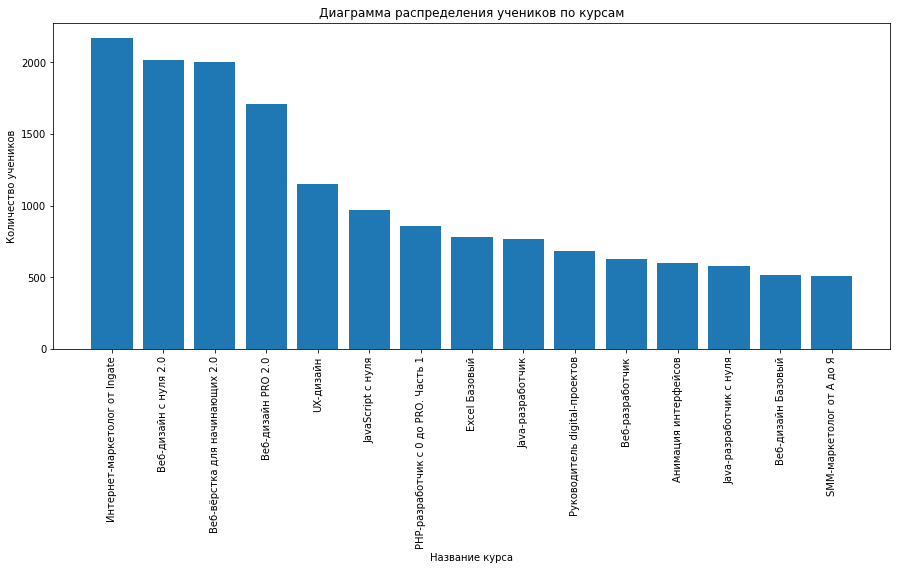

In [32]:
students_number_on_courses = df_main_students[['title', 'student_id']].groupby('title').nunique().sort_values('student_id', ascending= False)

fig, ax = plt.subplots(figsize = (15, 6))

plt.bar(students_number_on_courses.index, students_number_on_courses.student_id)
plt.title('Диаграмма распределения учеников по курсам')
plt.xlabel('Название курса')
plt.ylabel('Количество учеников')
plt.xticks(students_number_on_courses.index, rotation = 'vertical',);

##### 1.3. Постройте горизонтальный (столбцы должны располагаться горизонтально) bar-chart, отражающий количество студентов на каждом курсе. График должен иметь заголовок. Значения должны быть отсортированы. Цвет столбцов должен содержать информацию о сфере, к которой относится курс (то есть нужна легенда). Прозрачность должна стоять на отметке 0.1. На график должна быть нанесена линия медианы. У медианы должен быть свой цвет. Рамки у графика быть не должно ⭐

In [33]:
labels = ('Веб', 'Маркетинг', 'Программирование', 'Дизайн', 'Менеджмент')
colors = ('red', 'blue', 'yellow', 'cyan', 'pink')
cmap = dict(zip(colors, labels))

In [34]:
color_dict = {
            'Веб-дизайн с нуля 2.0' : 'red', 'Веб-вёрстка для начинающих 2.0' : 'red', 'Веб-дизайн PRO 2.0' : 'red', 'Веб-разработчик' : 'red',
            'Веб-дизайн Базовый' : 'red',
            'Интернет-маркетолог от Ingate' : 'blue', 'SMM-маркетолог от А до Я' : 'blue',
            'JavaScript с нуля' : 'yellow', 'PHP-разработчик с 0 до PRO. Часть 1' : 'yellow', 'Java-разработчик' : 'yellow', 
            'Java-разработчик c нуля': 'yellow', 'Excel Базовый' : 'yellow',
            'UX-дизайн' : 'cyan', 'Анимация интерфейсов' : 'cyan',
            'Руководитель digital-проектов' : 'pink'
}

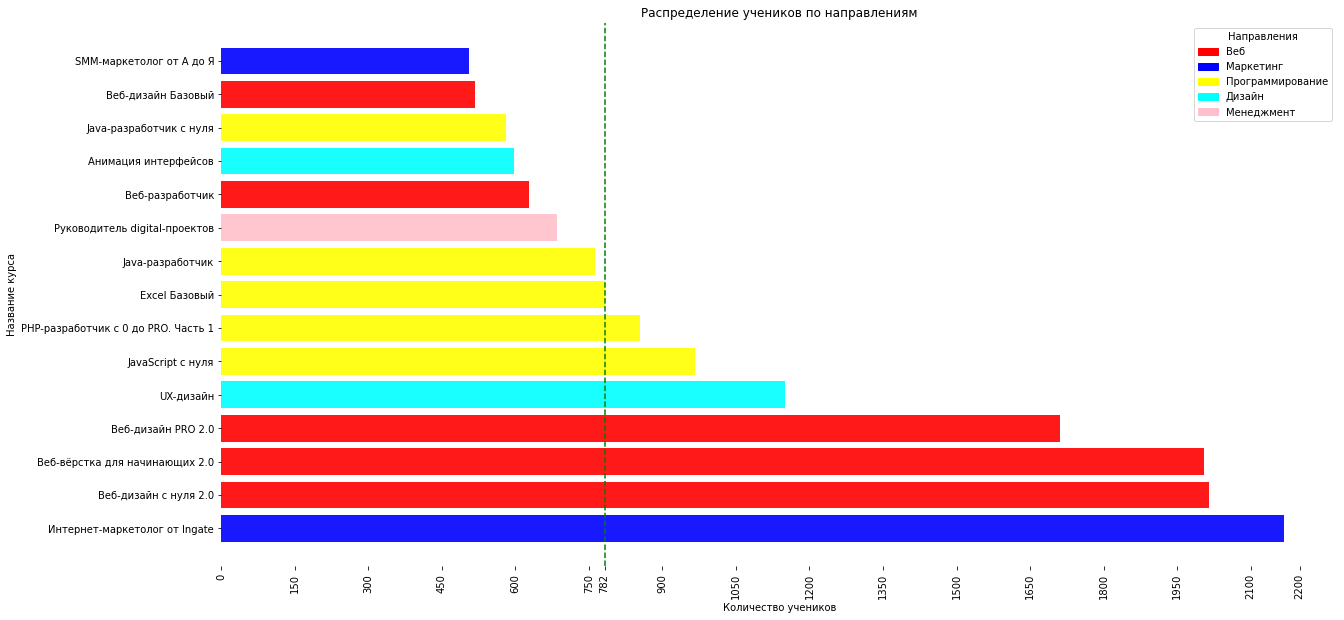

In [35]:
fig, ax = plt.subplots(figsize = (20, 10))

for i in range(len(students_number_on_courses.index)):

    ax.barh(students_number_on_courses.index[i], students_number_on_courses.student_id[i], alpha = 0.9, color = color_dict.get(students_number_on_courses.index[i]))

ax.axvline(x = students_number_on_courses.median()['student_id'], color = 'green', ls = '--', label = 'Медиана')
ax.set_ylabel('Название курса')
ax.set_xlabel('Количество учеников')
ax.set_title('Распределение учеников по направлениям')
plt.xticks(list(range(0, 2200, 150)) + [students_number_on_courses.median()['student_id'], 2200], rotation = 'vertical')
plt.legend()
ax.spines[['top', 'left', 'right', 'bottom']].set_visible(False)

patches = [Patch(color = v, label = k) for v, k in cmap.items()]

plt.legend(title = 'Направления', labels = labels , handles = patches)

plt.show()

Курсы по веб и программированию составляют наибольшую часть в данном исследовании - по 5 курсов в каждом направлении. Далее идут курсы по дизайну и маркетингу - по 2 в каждом направлении. Курс по менеджементу представлен всего один. Наименее и наиболее популярными являются курсы по маркетингу. 

## 2. Расчет потенциальной нагрузки на преподавателей

1. **(p)** Рассчитать прирост студентов на каждом курсе в каждом месяце за всю историю (каждый месяц в диапазоне от марта 2016 до июля 2019 включительно). Считать дату начала прохождения курса студентом по дате начала первой домашней работы.
2. **(m)** На основании первого пункта построить line-graph с приростом студентов в каждом месяце для каждого курса. 15 графиков. Графики должны иметь заголовки, оси должны быть подписаны. Ticks нужно развернуть так, чтобы они были читаемы.
3. **(m)** На основании первого пункта построить line-graph с несколькими линиями, отражающими прирост студентов в каждом месяце для каждого курса. 15 линий на графике. Ticks нужно развернуть так, чтобы они были читаемы. График должен иметь заголовок. Ось, отражающая прирост, должна быть подписана. Линия для каждого курса должна иметь свой цвет (нужна легенда). Рамок у графика быть не должно ⭐
4. **(p)** Рассчитать количество прогрессов по выполнению домашних работ в каждом месяце за всю историю (каждый месяц в диапазоне от марта 2016 до июля 2019 включительно) для каждого курса. Учитывать, что выполнение домашнего задания может перетекать из одного месяца в другой (такие дз надо включать в общее число прогрессов для всех месяцев, которые покрывает срок выполнения этих дз)
5. **(m)** Построить line-graph по четвертому пункту. 15 графиков. Графики должны иметь заголовки, оси должны быть подписаны. Ticks нужно развернуть так, чтобы они были читаемы
6. **(m)** Построить один line-graph для всех курсов по четвертому пункту. 15 линий на графике. Ticks нужно развернуть так, чтобы они были читаемы. График должен иметь заголовок. Ось, отражающая количество прогрессов, должна быть подписана. Линия для каждого курса должна иметь свой цвет (нужна легенда). Рамок у графика быть не должно ⭐
7. На основании рассчитанных значений сделайте аналитический вывод (должен быть полным и покрывать все полученные выше метрики)

##### 2.1. Рассчитать прирост студентов на каждом курсе в каждом месяце за всю историю (каждый месяц в диапазоне от марта 2016 до июля 2019 включительно). Считать дату начала прохождения курса студентом по дате начала первой домашней работы.


In [36]:
# создаем датафрейм с первыми домашними работами на каждом курсе.
df_hw_starts = df_main[df_main['is_homework'] == True].groupby('title').first().sort_values(['start_date'])
df_hw_starts = df_hw_starts.drop(['lesson_token', 'is_video', 'student_id', 'progress_id', 'status', 'finish_date', 'field'], axis = 1)
df_hw_starts

,course_id,module_number,module_title,lesson_number,lesson_title,is_homework,start_date
title,,,,,,,
Интернет-маркетолог от Ingate,bf27a4bf4ada4c756451703ea62a914f,1,"Введение в интернет-маркетинг: цели, инструмен...",7,Домашняя работа,True,2018-02-19 12:31:29.116821+00:00
Анимация интерфейсов,04ba6d0b40670c43a209141fa01fa784,1,"Введение в Motion Design. Тренды, разновидност...",3,Домашняя работа,True,2018-02-19 12:32:35.928905+00:00
Руководитель digital-проектов,0770b1b039964228294f1f34b29fc2c1,1,Экологичный путь менеджера,4,Домашняя работа,True,2018-02-19 12:34:31.347176+00:00
Java-разработчик,6e4837f0a65c68efbfdd0594d6774701,1,Вводный модуль,8,Домашняя работа,True,2018-02-22 18:21:03.565139+00:00
Excel Базовый,ac634845fb0350d0e9d49078aaa4b68f,1,Основной функционал Excel,11,Домашняя работа,True,2018-03-16 09:21:41.863332+00:00
UX-дизайн,dad6f6ffc086caa89e2f40c28a9c7490,1,Профессия дизайнера в эпоху цифровых перемен,8,Домашняя работа,True,2018-03-16 18:04:10.130121+00:00
Веб-дизайн Базовый,17013cd19d25cb3f28dc1b2683721bb9,3,Базовые знания о типографике. Практика Photoshop,2,Домашняя работа,True,2018-05-19 16:04:44.884489+00:00
JavaScript с нуля,e9bb9205eeed307ee7cbaa08bfd166c3,1,Знакомство с языком,7,Домашняя работа,True,2018-06-19 18:40:00.576904+00:00
Веб-разработчик,480d25ad36878fce09e7aada316ba1a6,1,О программе,2,Домашняя работа,True,2018-06-21 16:32:12.513304+00:00


In [37]:
# мерджим с основным датафрейм чтобы остались только записи с началом домашних работ
df_hw_starts_count = df_hw_starts.merge(df_main, 
                                        how = 'left', 
                                        on = ['course_id', 'module_number', 'lesson_number'],
                                        suffixes= ('_count', '_main'))
df_hw_starts_count.shape

(10807, 19)

In [38]:
print(df_main.shape)
print(df_hw_starts_count.shape)

(350677, 15)
(10807, 19)


In [39]:
# создаем функцию для поиска прироста количества студентов на курсе
def students_delta(course_name):
    df_22 = df_hw_starts_count[df_hw_starts_count.title == course_name]\
        .sort_values('start_date_main', ascending= True)\
        .groupby(pd.Grouper(key = 'start_date_main', freq= 'm'))\
        .agg('count')['student_id']

    return df_22

In [40]:
# список курсов
list_of_courses = list(df_main.title.unique())

In [41]:
for i in list_of_courses:
    print(i, students_delta(i))

Java-разработчик c нуля start_date_main
2019-03-31 00:00:00+00:00     74
2019-04-30 00:00:00+00:00    109
2019-05-31 00:00:00+00:00     74
2019-06-30 00:00:00+00:00     98
2019-07-31 00:00:00+00:00     63
Freq: M, Name: student_id, dtype: int64
Веб-дизайн Базовый start_date_main
2017-03-31 00:00:00+00:00     2
2017-04-30 00:00:00+00:00     0
2017-05-31 00:00:00+00:00     0
2017-06-30 00:00:00+00:00     0
2017-07-31 00:00:00+00:00     0
2017-08-31 00:00:00+00:00     0
2017-09-30 00:00:00+00:00     0
2017-10-31 00:00:00+00:00     0
2017-11-30 00:00:00+00:00     0
2017-12-31 00:00:00+00:00     0
2018-01-31 00:00:00+00:00     0
2018-02-28 00:00:00+00:00    56
2018-03-31 00:00:00+00:00    57
2018-04-30 00:00:00+00:00    64
2018-05-31 00:00:00+00:00    68
2018-06-30 00:00:00+00:00    61
2018-07-31 00:00:00+00:00    32
2018-08-31 00:00:00+00:00    21
2018-09-30 00:00:00+00:00     7
2018-10-31 00:00:00+00:00     4
2018-11-30 00:00:00+00:00     9
2018-12-31 00:00:00+00:00     8
2019-01-31 00:00

##### 2.2. На основании первого пункта построить line-graph с приростом студентов в каждом месяце для каждого курса. 15 графиков. Графики должны иметь заголовки, оси должны быть подписаны. Ticks нужно развернуть так, чтобы они были читаемы.

In [42]:
dates = pd.date_range(start = '2016-03-01', end= '2019-08-01', freq= 'M').tolist()
courses_names = list(df_main.title.unique())

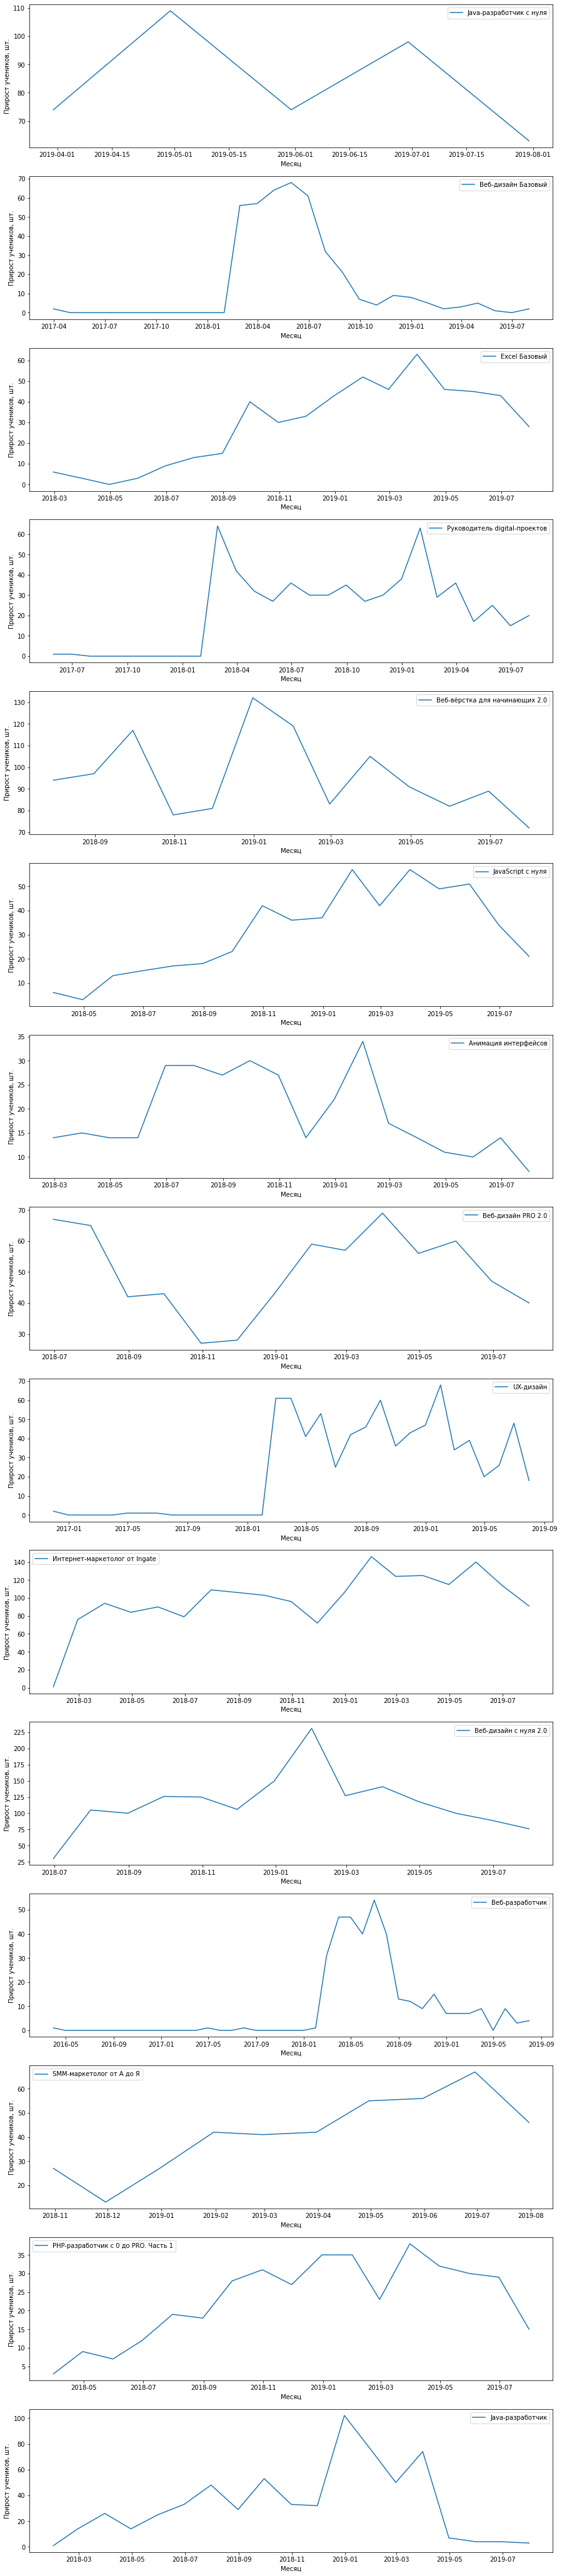

In [43]:
fig, axs = plt.subplots(nrows = 15, figsize = (15, 75))


for i, course in enumerate(courses_names):
    graph = students_delta(course)
    axs[i].plot(graph.index, graph.values, label = course)
    axs[i].set_ylabel('Прирост учеников, шт.')
    axs[i].set_xlabel('Месяц')
    axs[i].legend()

plt.show()
    


##### 2.3. На основании первого пункта построить line-graph с несколькими линиями, отражающими прирост студентов в каждом месяце для каждого курса. 15 линий на графике. Ticks нужно развернуть так, чтобы они были читаемы. График должен иметь заголовок. Ось, отражающая прирост, должна быть подписана. Линия для каждого курса должна иметь свой цвет (нужна легенда). Рамок у графика быть не должно ⭐

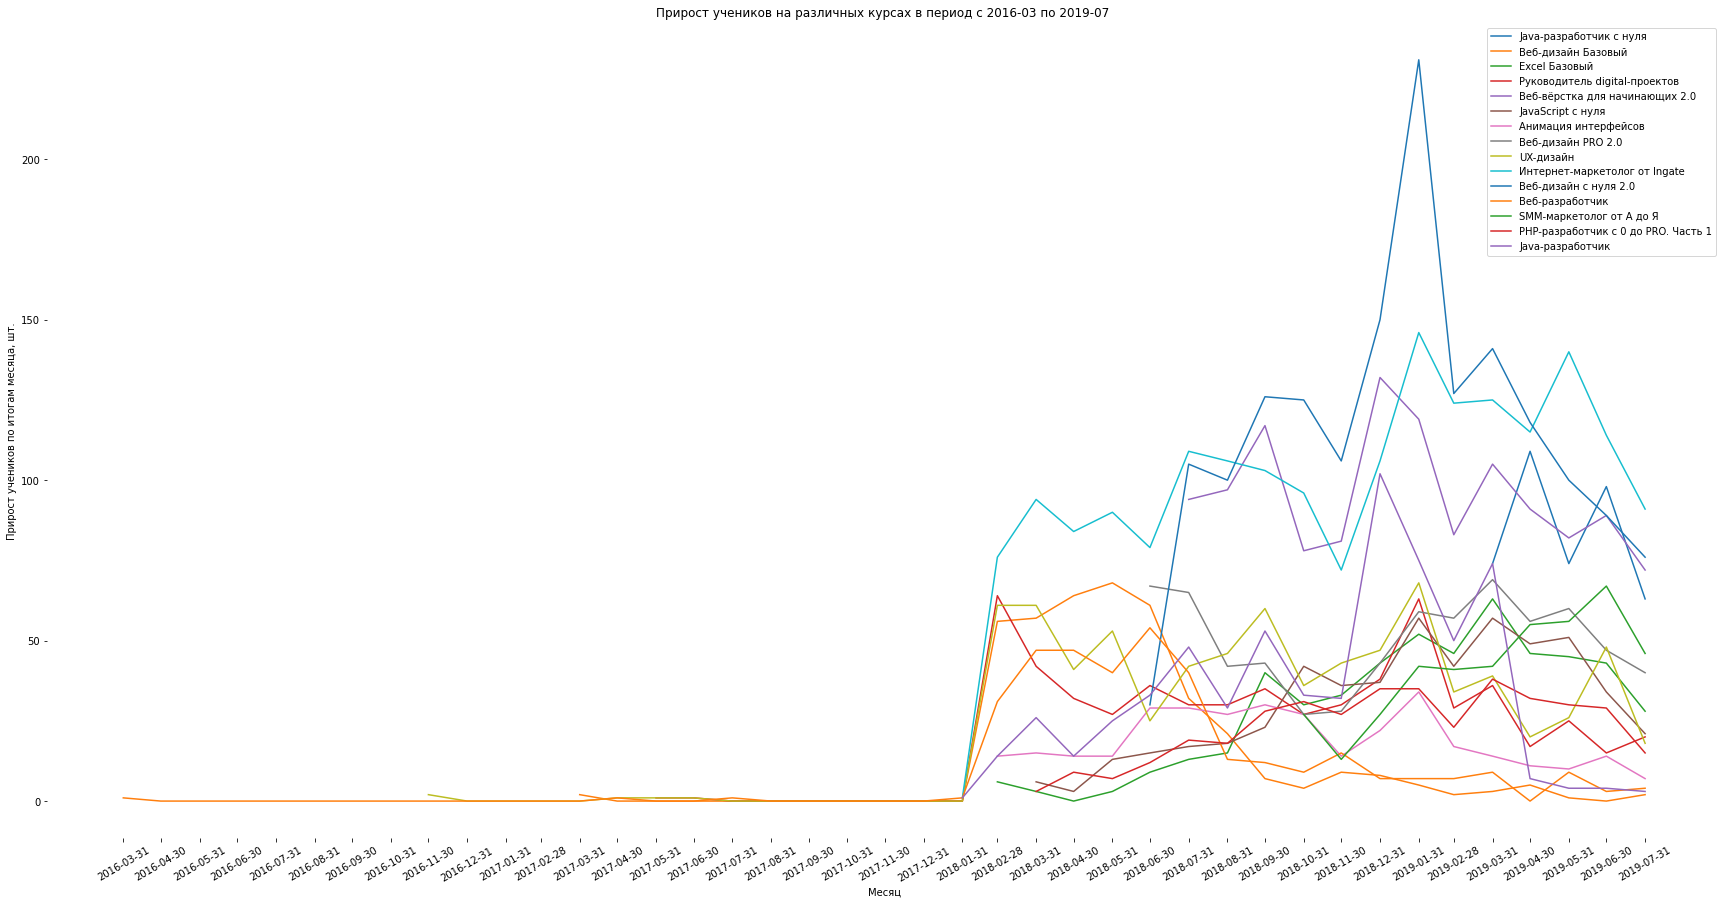

In [44]:
fig, ax = plt.subplots(figsize = (30, 15))


for course in courses_names:
    graph = students_delta(course)
    plt.plot(graph.index, graph.values, label = course)
    plt.xticks(dates, rotation = 30)
    plt.ylabel('Прирост учеников по итогам месяца, шт.')
    plt.xlabel('Месяц')
    plt.title('Прирост учеников на различных курсах в период с 2016-03 по 2019-07 ')
    plt.legend()
    ax.spines[['top', 'left', 'right', 'bottom']].set_visible(False)

plt.show()

##### 2.4. Рассчитать количество прогрессов по выполнению домашних работ в каждом месяце за всю историю (каждый месяц в диапазоне от марта 2016 до июля 2019 включительно) для каждого курса. Учитывать, что выполнение домашнего задания может перетекать из одного месяца в другой (такие дз надо включать в общее число прогрессов для всех месяцев, которые покрывает срок выполнения этих дз)

In [140]:
java_hw_done = df_main[(df_main.title == 'Excel Базовый') & (df_main.is_homework == True)]\
                                                                [['title', 'progress_id', 'lesson_token', 'start_date', 'finish_date']].copy()

In [141]:

java_hw_done.start_date = java_hw_done.start_date.apply(lambda x: pd.Timestamp(x)+ Day() - MonthBegin())
java_hw_done.finish_date = java_hw_done.finish_date.where(java_hw_done.finish_date.notnull(), java_hw_done.start_date + MonthEnd())


In [142]:
java_hw_done['start_date'] = pd.to_datetime(java_hw_done.start_date, utc = True)
java_hw_done['finish_date'] = pd.to_datetime(java_hw_done.finish_date, utc = True)

In [143]:
java_hw_done['time']=java_hw_done[['start_date','finish_date']].apply(lambda x: list(pd.date_range(start=x['start_date'], 
                                                                periods=ceil((x['finish_date'] - x['start_date'])/np.timedelta64(1, 'M')), 
                                                                freq='M')),axis=1)

In [144]:
java_hw_done = java_hw_done.explode(column= 'time', ignore_index= True)
java_hw_done['time'] = java_hw_done['time'].dt.tz_localize(None)
java_hw_done['time'] = java_hw_done['time'].dt.to_period('M')

0       2018-03
1       2018-07
2       2019-01
3       2018-09
4       2019-06
         ...   
3410    2019-03
3411    2019-04
3412    2019-04
3413    2019-05
3414    2019-03
Name: time, Length: 3415, dtype: period[M]

In [145]:
result = java_hw_done.groupby(['title','time'])['title'].count().unstack(fill_value = 0).stack().to_frame().reset_index()
result.columns = ['title','year_and_month', 'workload']
result.head()

,title,year_and_month,workload
0,Excel Базовый,2018-02,37
1,Excel Базовый,2018-03,7
2,Excel Базовый,2018-04,13
3,Excel Базовый,2018-05,17
4,Excel Базовый,2018-06,37


In [146]:
def progress_count(course):
    fdf = df_main[(df_main.title == course) & (df_main.is_homework == True)]\
                                                                [['title', 'progress_id', 'lesson_token', 'start_date', 'finish_date']].copy()
    fdf.start_date = fdf.start_date.apply(lambda x: pd.Timestamp(x)+ Day() - MonthBegin())
    fdf.finish_date = fdf.finish_date.where(fdf.finish_date.notnull(), fdf.start_date + MonthEnd())
    fdf['start_date'] = pd.to_datetime(fdf.start_date, utc = True)
    fdf['finish_date'] = pd.to_datetime(fdf.finish_date, utc = True)
    fdf['time']=fdf[['start_date','finish_date']].apply(lambda x: list(pd.date_range(start=x['start_date'], 
                                                                periods=ceil((x['finish_date'] - x['start_date'])/np.timedelta64(1, 'M')), 
                                                                freq='M')),axis=1)
    fdf = fdf.explode(column= 'time', ignore_index= True)
    fdf['time'] = fdf['time'].dt.tz_localize(None)
    fdf['time'] = fdf['time'].dt.to_period('M')
    fdf = fdf.groupby(['title','time'])['title'].count().unstack(fill_value = 0).stack().to_frame().reset_index()
    fdf.columns = ['title','year_and_month', 'workload']
    
    return fdf



In [147]:
b = progress_count('Excel Базовый')
b

,title,year_and_month,workload
0,Excel Базовый,2018-02,37
1,Excel Базовый,2018-03,7
2,Excel Базовый,2018-04,13
3,Excel Базовый,2018-05,17
4,Excel Базовый,2018-06,37
5,Excel Базовый,2018-07,76
6,Excel Базовый,2018-08,92
7,Excel Базовый,2018-09,188
8,Excel Базовый,2018-10,237
9,Excel Базовый,2018-11,243


In [ ]:
for _ in list_of_courses:
    print(_)
    print(progress_count(_))

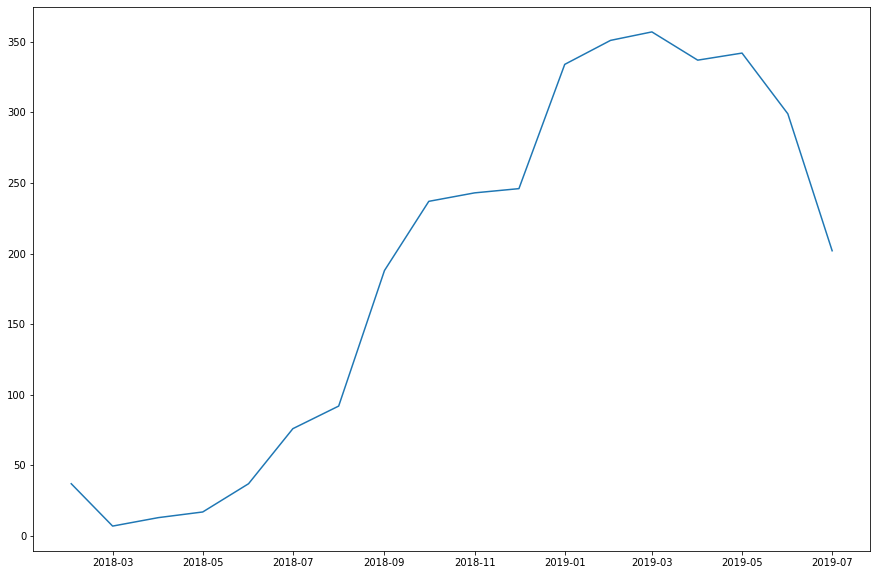

In [148]:
fig, ax = plt.subplots(figsize = (15, 10))

ax.plot(b['year_and_month'].dt.to_timestamp(), b['workload'])

plt.show()

##### 2.5 Построить line-graph по четвертому пункту. 15 графиков. Графики должны иметь заголовки, оси должны быть подписаны. Ticks нужно развернуть так, чтобы они были читаемы


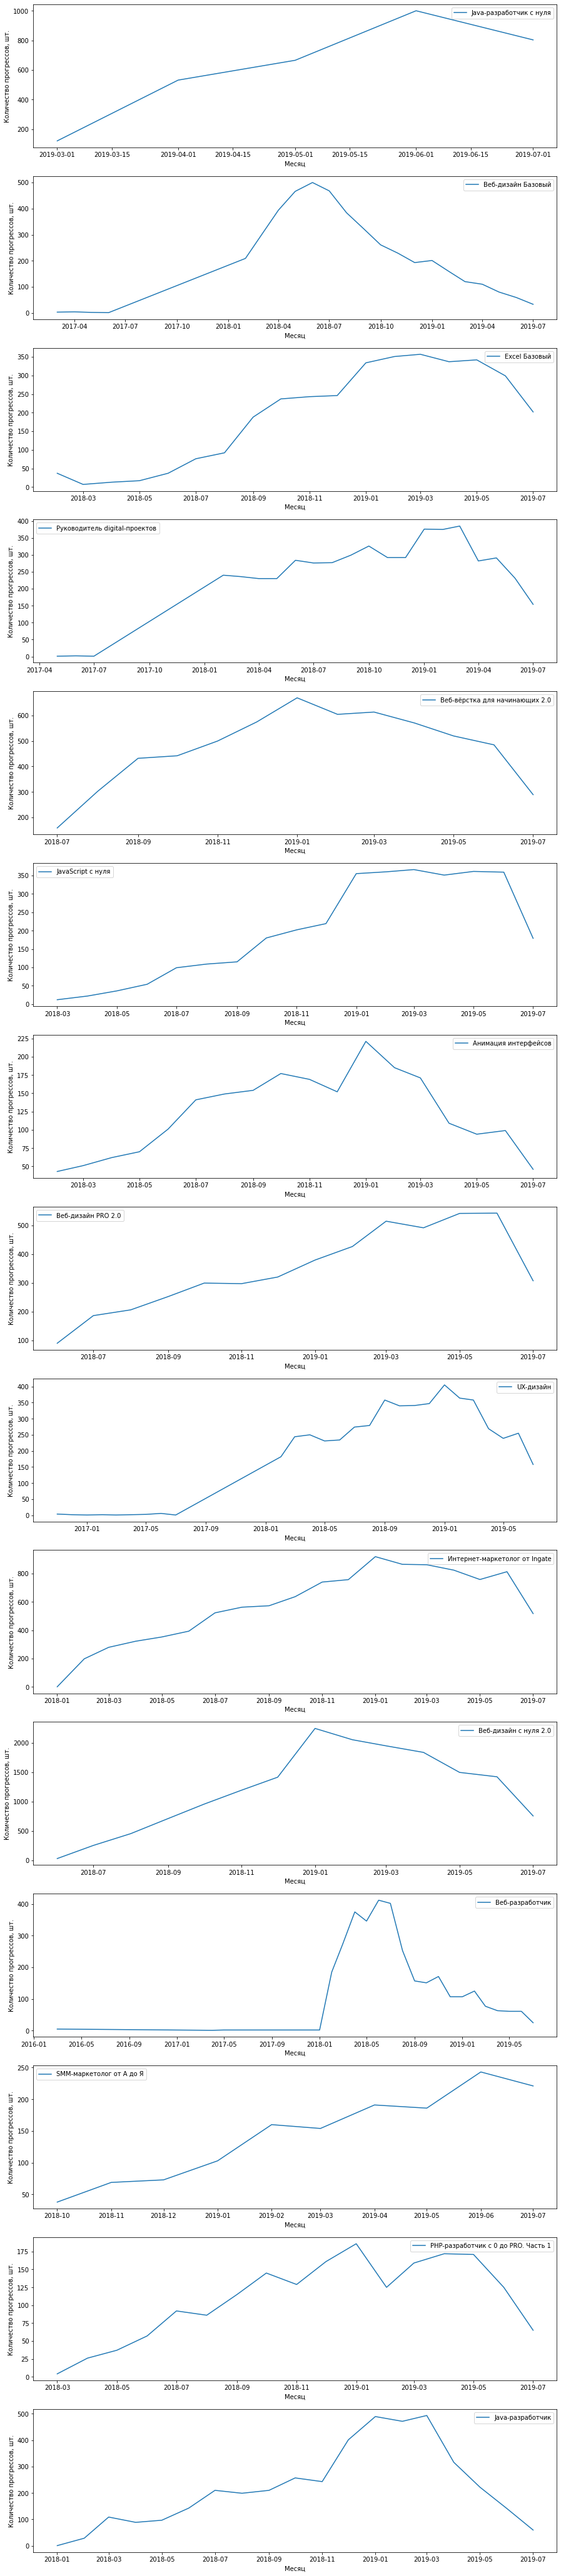

In [149]:
fig, axs = plt.subplots(nrows = 15, figsize = (15, 75))


for i, course in enumerate(courses_names):
    graph = progress_count(course)
    axs[i].plot(graph['year_and_month'].dt.to_timestamp(), graph['workload'], label = course)
    axs[i].set_ylabel('Количество прогрессов, шт.')
    axs[i].set_xlabel('Месяц')
    axs[i].legend()

plt.show()

##### 2.6 Построить один line-graph для всех курсов по четвертому пункту. 15 линий на графике. Ticks нужно развернуть так, чтобы они были читаемы. График должен иметь заголовок. Ось, отражающая количество прогрессов, должна быть подписана. Линия для каждого курса должна иметь свой цвет (нужна легенда). Рамок у графика быть не должно ⭐

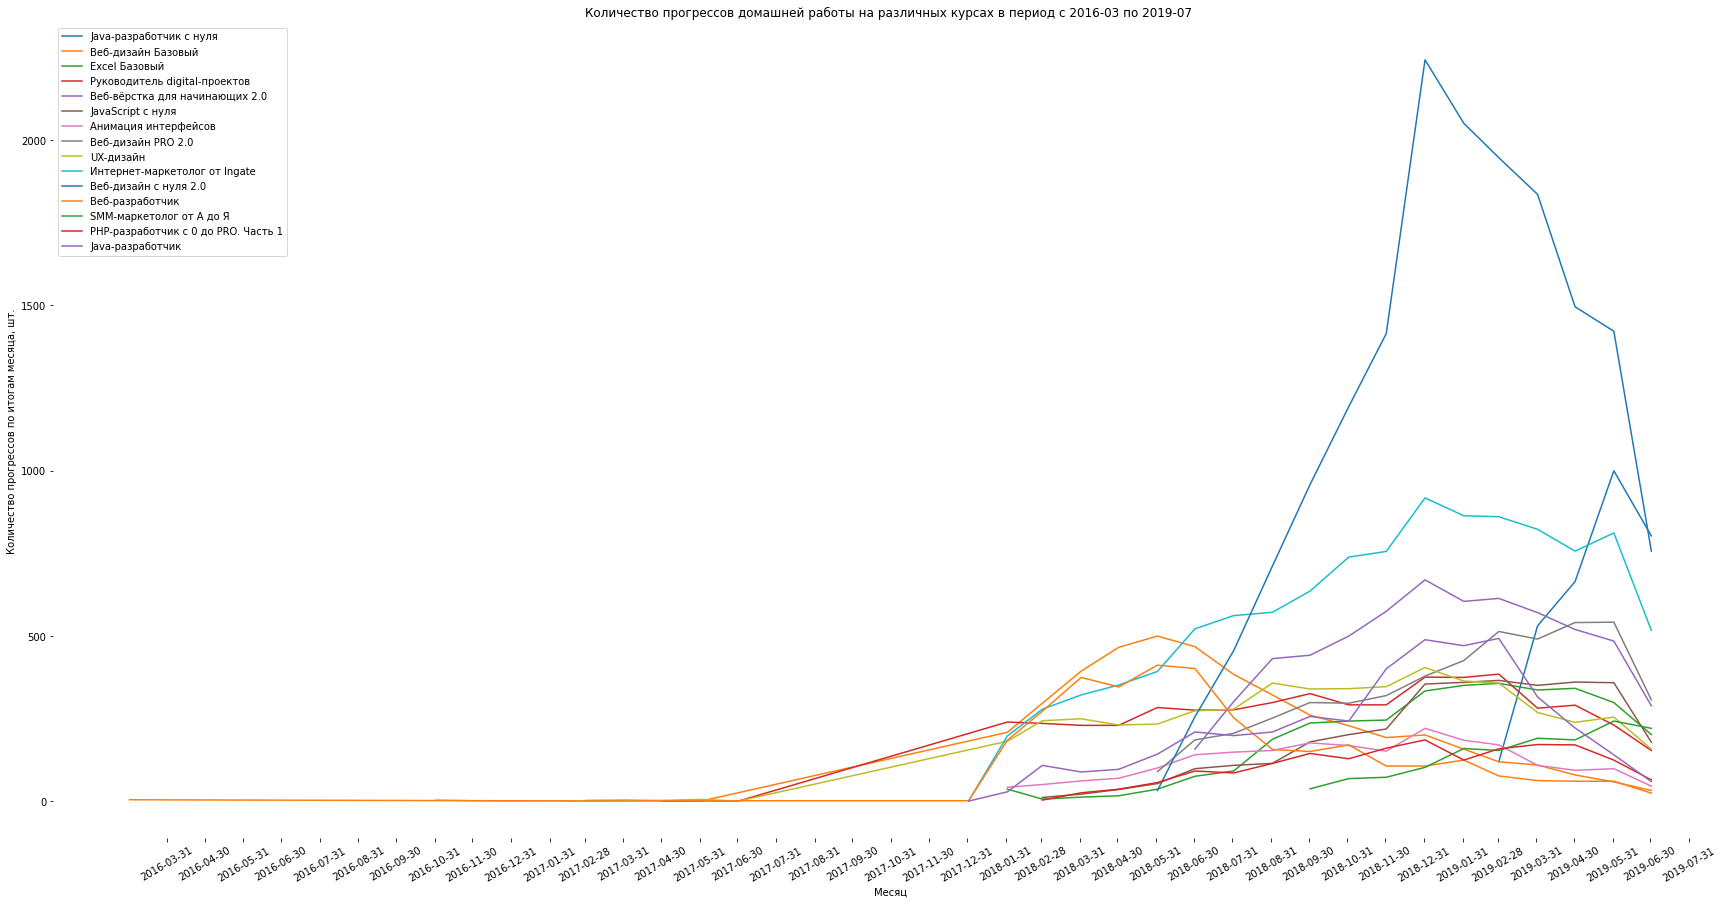

In [150]:
fig, ax = plt.subplots(figsize = (30, 15))


for course in courses_names:
    graph = progress_count(course)
    plt.plot(graph['year_and_month'].dt.to_timestamp(), graph['workload'], label = course)
    plt.xticks(dates, rotation = 30)
    plt.ylabel('Количество прогрессов по итогам месяца, шт.')
    plt.xlabel('Месяц')
    plt.title('Количество прогрессов домашней работы на различных курсах в период с 2016-03 по 2019-07 ')
    plt.legend()
    ax.spines[['top', 'left', 'right', 'bottom']].set_visible(False)

plt.show()

## 3. Выявление проблемных модулей

1. **(p)** Рассчитать минимальное, максимальное, среднее, медианное время прохождения каждого модуля (разность между временем начала и окончания выполнения домашней работы) для каждого курса. Если домашних заданий в модуле несколько, то считать разность между временем начала выполнения первой домашней работы и временем окончания выполнения последней домашней работы в модуле
2. **(m)** На основании первого пункта построить line-graph с медианным временем прохождения каждого модуля для каждого курса. 15 графиков. Графики должны иметь заголовки
3. **(p)**  Чтобы выявить сезонность, посчитать медианное время выполнения домашней работы по месяцам (12 месяцев, январь-декабрь) для каждого курса. 
4. **(m)** На основании третьего пункта построить line-graph, на который будут нанесены линии для каждого курса с медианным временем выполнения домашней работы по месяцам. 15 линий на графике. График должен иметь заголовок. Ось, отражающая время прохождения, должна быть подписана. Линия для каждого курса должна иметь свой цвет (нужна легенда). Рамок у графика быть не должно  ⭐
5. На основании рассчитанных значений сделайте аналитический вывод (должен быть полным и покрывать все полученные выше метрики)

In [ ]:
### YOUR CODE HERE ###




## 4. Расчет конверсии

1. **(p)** Посчитать конверсию перехода студентов из одного модуля в другой на каждом курсе. Формула: отношение количества студентов, приступивших к выполнению домашнего задания в этом модуле (если дз в модуле несколько, то считать по первому дз в модуле), к количеству студентов, сдавших задание в предыдущем модуле (если дз в модуле несколько, то считать по последнему дз в модуле).
2. **(m)** Постройте bar-chart, отражающий конверсию перехода студентов из одного модуля в другой на каждом курсе. График должен иметь заголовок. Ticks нужно развернуть так, чтобы они были читаемы
3. **(m)** Постройте горизонтальный (столбцы должны располагаться горизонтально) bar-chart, отражающий конверсию перехода студентов из одного модуля в другой на каждом курсе. 15 графиков. Графики должны иметь заголовки. Ticks должны содержать номер и название модуля. Цвет столбцов графиков должен содержать информацию о сфере, к которой относится курс (нужна легенда). Прозрачность должна стоять на отметке 0.1. На графики должна быть нанесена линия медианы конверсии для каждого курса. У медианы должен быть свой цвет. Рамок у графиков быть не должно ⭐
4. На основании рассчитанных значений сделайте аналитический вывод (должен быть полным и покрывать все полученные выше метрики)

In [ ]:
### YOUR CODE HERE ###




## 5. Метрика успеваемости 

&nbsp;&nbsp;&nbsp;&nbsp;*(необязательное задание)*

Иногда студенты берут курсы, которые оказываются для них неподъемными. Это может быть как по причинам недостаточной изначальной подготовки, так и по причинам, связанным с низкой мотивацией студента. Для улучшения качества контента полезно выявить причину. На основании имеющихся данных придумайте метрику успеваемости студента. **Обоснуйте ее.** Выявите таких студентов на каждом курсе, чтобы предоставить продюсерам список проблемных студентов. 

In [ ]:
### YOUR CODE HERE ###


